In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Ejercicio 3: Usando el archivo crime_data.csv, Segmenta este conjunto de datos utilizando k-means y obtén los centroides de cada clúster y el listado de los estados en cada uno de los clústeres. Para ello, se ha de encontrar el número óptimo de clúster en el que se divide el conjunto de datos.

##### Importamos las librerias que necesitaremos

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

##### leemos el archivo. Cambiar la carpeta a path relativo o la carpeta que corresponda

In [28]:
data_raw = pd.read_csv('C:\\Users\\javij\\Desktop\\Master\\Aprendizaje_Automatico_Aplicado\\crime_data.csv')

##### Resumen general del dataset

In [29]:
data_raw.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


##### Quitamos del set de datos la columna State, ya que no haremos data minig con ella

In [30]:
a = data_raw.drop('State',axis=1) 

##### escalamos los valores para tener media 0 y desviacion estandar 1. a_scale es un numpy-array, no un DF.
##### Antes debemos importar esta funcion de sklearn

In [32]:
from sklearn.preprocessing import scale
a_scale = scale(a) 

##### Sacamos el numero optimo de clusters con el metodo del codo. Usamos la funcion que se nos da en los apuntes. Este metodo, en resumen
##### indica a partir de que numero "k" de clusteres la ganancia es escasa, y por tanto no es ventajoso seguir aumentando "k"

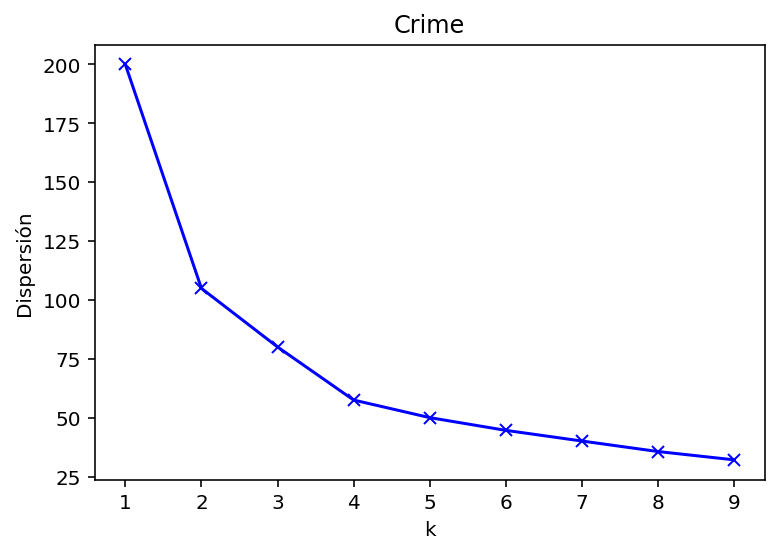

In [33]:
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(a_scale,'Crime')

##### parece que el codo esta en k=4 pero lo miramos con silhouete

In [ ]:
def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []

    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))

    plt.plot(range(2, max_k), sillhouette_avgs)
    plt.title(figure_name)


plot_sillhouette(a_scale, 'crime')

##### Se observa un maximo para k = 4. Por tanto el numero de clusters es 4. Hacemos el modelo KMeans

In [34]:
km = KMeans(n_clusters=4, random_state=1).fit(a_scale)
centroids = km.cluster_centers_

##### Sacamos en consola los resultadios. Cada fila son las coordenadas 4-dimensionales de cada centroide

In [36]:
print(centroids) 

[[ 0.70212683  1.04999438  0.72997363  1.28990383]
 [ 1.42622412  0.88321132 -0.82279055  0.01946669]
 [-0.97130281 -1.11783581 -0.93954982 -0.97657842]
 [-0.49440658 -0.3864845   0.58167593 -0.26431024]]


##### Probamos a cambiar el random_state a 10 por si hubiera alguna diferencia

In [37]:
km2 = KMeans(n_clusters=4, random_state=10).fit(a_scale)
centroids2 = km2.cluster_centers_ # 
print(centroids2)
## el resultado son 4 centroides,de 0 a 3, cuyas coordenadas 4-dimensionales se leen por filas.

[[ 1.42622412  0.88321132 -0.82279055  0.01946669]
 [ 0.70212683  1.04999438  0.72997363  1.28990383]
 [-0.49440658 -0.3864845   0.58167593 -0.26431024]
 [-0.97130281 -1.11783581 -0.93954982 -0.97657842]]


##### Son los mismos centroides (se leen por filas) pero desorganizados respecto al primer “km”. Seguimos adelante con km

##### Para saber a que cluster pertenece cada estado, calculamos la distancia euclidea a cada centroide. 
##### Para cada estado tendremos una fila de 4 distancias y nos quedamos con
##### la que sea minima. Despues habra que buscar la columna de ese minimo

In [38]:
indx = [0,1,2,3] # indice para recorrer las 4 columnas
p = np.linspace(0,49,50,dtype='int') # indice para recorrer los estados de 0 a 49
distances = np.zeros((50,4)) # inicializar matriz de distancias
for i in p:
    for j in indx:
        d=np.linalg.norm(a_scale[i,] - centroids[j,])
        distances[i,j] = d # va almacenando cada distancia en distances[i,j]


##### El primer estado, ALabama, esta a 1.90 del centroide 0, a 0.35 del centroide 1, a 3.11 del centroide 2..

In [39]:
print(distances) 

[[1.90362352 0.35537674 3.1173551  2.39633991]
 [2.31211973 2.69258382 4.40858258 3.77264707]
 [0.85288361 2.5750427  3.97848805 2.40333173]
 [2.52161396 1.39758379 1.98105037 1.92295548]
 [1.40080186 3.53628207 4.90635127 3.21395573]
 [1.11723515 2.92087532 3.84218786 2.36466123]
 [3.45128404 3.54678125 1.78576625 1.07469177]
 [2.22511334 2.33837537 2.4711004  1.25193111]
 [1.45362277 2.4447865  5.04728308 3.59759521]
 [2.1285334  1.10245553 3.90972318 3.11340299]
 [3.22541569 3.73297727 2.39098772 1.30502519]
 [3.59947299 3.12487442 0.60989838 1.6500643 ]
 [1.11403932 2.2185656  3.61100986 1.92731802]
 [2.46663934 2.35945255 1.6094773  0.81696007]
 [4.1573849  3.71800448 0.55411611 1.92081586]
 [2.71983643 2.5857275  1.35781393 0.63185068]
 [3.07020305 1.98686175 1.52826376 1.84737339]
 [1.74165438 0.92593178 3.724435   2.7067668 ]
 [4.3700236  3.6769699  0.59365463 2.25610239]
 [1.0060569  1.47333543 3.78399834 2.58918456]
 [2.76645148 3.35686447 2.49812072 0.87995967]
 [0.38911615 

##### Sacamos la posicion del minimo de cada fila y lo almacenamos en una lista que llamo clus_list

In [41]:
clus_list = list() ## inicializar lista

for i in p:
    for j in indx:
        if distances[i,j] == min(distances[i,]):
            clus_list.append(j)

In [42]:
print(clus_list)

[1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 2, 0, 3, 0, 2, 1, 0, 2, 2, 0, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 3, 1, 2, 1, 0, 3, 2, 3, 3, 2, 2, 3]


##### El resultado es correcto ya que es igual al dado por km.labels_

In [43]:
print(km.labels_)

[1 0 0 1 0 0 3 3 0 1 3 2 0 3 2 3 2 1 2 0 3 0 2 1 0 2 2 0 2 3 0 0 1 2 3 3 3
 3 3 1 2 1 0 3 2 3 3 2 2 3]


##### Por ultimo adjuntamos la columna "Cluster" al dataset

In [45]:
data_raw['Cluster']=clus_list
print(data_raw)

             State  Murder  Assault  UrbanPop  Rape  Cluster
0          Alabama    13.2      236        58  21.2        1
1           Alaska    10.0      263        48  44.5        0
2          Arizona     8.1      294        80  31.0        0
3         Arkansas     8.8      190        50  19.5        1
4       California     9.0      276        91  40.6        0
5         Colorado     7.9      204        78  38.7        0
6      Connecticut     3.3      110        77  11.1        3
7         Delaware     5.9      238        72  15.8        3
8          Florida    15.4      335        80  31.9        0
9          Georgia    17.4      211        60  25.8        1
10          Hawaii     5.3       46        83  20.2        3
11           Idaho     2.6      120        54  14.2        2
12        Illinois    10.4      249        83  24.0        0
13         Indiana     7.2      113        65  21.0        3
14            Iowa     2.2       56        57  11.3        2
15          Kansas     6

#### Con esto queda terminado el caso practico del tema 3 sobre Aprendizaje Automatico